In [10]:
import pandas as pd
import numpy as np
import techniques
import matplotlib.pyplot as plt

In [11]:
bcancer_df = pd.read_csv("breast_cancer.csv")
bcancer_df = bcancer_df.sample(frac=1).reset_index(drop=True)
bcancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,86973702,B,14.44,15.18,93.97,640.1,0.09970,0.10210,0.084870,0.055320,...,19.85,108.60,766.9,0.1316,0.27350,0.31030,0.15990,0.2691,0.07683,NaN
1,886452,M,13.96,17.05,91.43,602.4,0.10960,0.12790,0.097890,0.052460,...,22.07,108.10,826.0,0.1512,0.32620,0.32090,0.13740,0.3068,0.07957,NaN
2,894089,B,12.49,16.85,79.19,481.6,0.08511,0.03834,0.004473,0.006423,...,19.71,84.48,544.2,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,NaN
3,9112594,B,13.00,25.13,82.61,520.2,0.08369,0.05073,0.012060,0.017620,...,31.88,91.06,628.5,0.1218,0.10930,0.04462,0.05921,0.2306,0.06291,NaN
4,908489,M,13.98,19.62,91.12,599.5,0.10600,0.11330,0.112600,0.064630,...,30.80,113.90,869.3,0.1613,0.35680,0.40690,0.18270,0.3179,0.10550,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,91544002,B,11.06,17.12,71.25,366.5,0.11940,0.10710,0.040630,0.042680,...,20.74,76.08,411.1,0.1662,0.20310,0.12560,0.09514,0.2780,0.11680,NaN
565,875878,B,12.91,16.33,82.53,516.4,0.07941,0.05366,0.038730,0.023770,...,22.00,90.81,600.6,0.1097,0.15060,0.17640,0.08235,0.3024,0.06949,NaN
566,88119002,M,19.53,32.47,128.00,1223.0,0.08420,0.11300,0.114500,0.066370,...,45.41,180.20,2477.0,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568,NaN
567,865468,B,13.37,16.39,86.10,553.5,0.07115,0.07325,0.080920,0.028000,...,22.75,91.99,632.1,0.1025,0.25310,0.33080,0.08978,0.2048,0.07628,NaN


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
bcancer_df['diagnosis'] = np.where(bcancer_df['diagnosis'] == 'M', 1, -1)
column_sels = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'texture_worst', 'perimeter_worst', 'area_worst']
bcancer_df.loc[:, column_sels] = scaler.fit_transform(bcancer_df.loc[:, column_sels])
bcancer_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,86973702,-1,0.088814,-0.956343,0.082420,-0.042062,0.09970,0.10210,0.084870,0.055320,...,-0.948927,0.039877,-0.199845,0.1316,0.27350,0.31030,0.15990,0.2691,0.07683,NaN
1,886452,1,-0.047513,-0.521181,-0.022203,-0.149284,0.10960,0.12790,0.097890,0.052460,...,-0.587414,0.024984,-0.095952,0.1512,0.32620,0.32090,0.13740,0.3068,0.07957,NaN
2,894089,-1,-0.465014,-0.567723,-0.526371,-0.492852,0.08511,0.03834,0.004473,0.006423,...,-0.971725,-0.678558,-0.591332,0.1104,0.04953,0.01938,0.02784,0.1917,0.06174,NaN
3,9112594,-1,-0.320167,1.359089,-0.385500,-0.383070,0.08369,0.05073,0.012060,0.017620,...,1.010084,-0.482567,-0.443140,0.1218,0.10930,0.04462,0.05921,0.2306,0.06291,NaN
4,908489,1,-0.041833,0.076875,-0.034972,-0.157532,0.10600,0.11330,0.112600,0.064630,...,0.834212,0.197742,-0.019835,0.1613,0.35680,0.40690,0.18270,0.3179,0.10550,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,91544002,-1,-0.871154,-0.504892,-0.853421,-0.820208,0.11940,0.10710,0.040630,0.042680,...,-0.803996,-0.928759,-0.825310,0.1662,0.20310,0.12560,0.09514,0.2780,0.11680,NaN
565,875878,-1,-0.345728,-0.688730,-0.388796,-0.393877,0.07941,0.05366,0.038730,0.023770,...,-0.598813,-0.490013,-0.492186,0.1097,0.15060,0.17640,0.08235,0.3024,0.06949,NaN
566,88119002,1,1.534446,3.067156,1.484123,1.615766,0.08420,0.11300,0.114500,0.066370,...,3.213360,2.172543,2.806362,0.1408,0.40970,0.39950,0.16250,0.2713,0.07568,NaN
567,865468,-1,-0.215082,-0.674768,-0.241747,-0.288361,0.07115,0.07325,0.080920,0.028000,...,-0.476680,-0.454866,-0.436812,0.1025,0.25310,0.33080,0.08978,0.2048,0.07628,NaN


In [13]:
y = np.array(bcancer_df['diagnosis'])
col_sel = bcancer_df.columns[2 : -1]
x = np.array(bcancer_df[col_sel])

In [14]:
#p_n = int(await input("Type how many neurons do you want to use in the hidden layer : "))
p_n = 100
lam_val = np.arange(start = 0.05, stop = 1, step = 0.01)
best_lam, best_acc, arr_ret = techniques.grid_searchCV_L2(xin = x, yin = y, p = p_n, lam = lam_val, CV_groups = 15, classification = True)

The model with best accuracy has the mean accuracy : 0.9407171877760114
The model parameters with best accuracy is using lambda : 0.5000000000000001


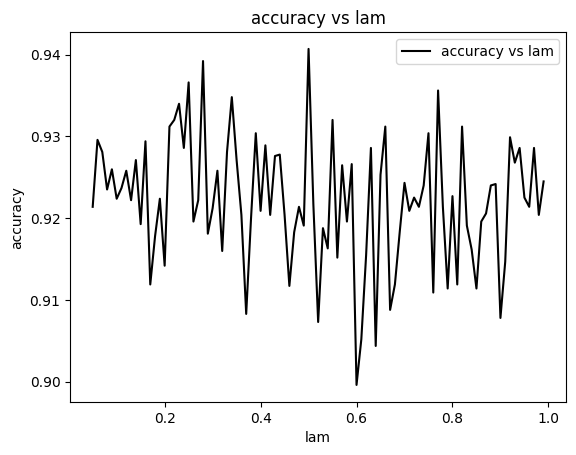

In [15]:
x_plot = np.arange(start = 0.05, stop = lam_val[lam_val.shape[0] -1], step = 0.01)
plt.plot(x_plot, arr_ret, color = 'black', label = 'accuracy vs lam')
plt.title('accuracy vs lam')
plt.xlabel('lam')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, train_size = 0.8)

In [17]:
ret = techniques.train_ELM_L2_REG(xin = X_train, yin = y_train, p = p_n, lam = best_lam, control = True)
best_w = ret[0]
best_h = ret[1]
best_z = ret[2]

A acurácia é de 88.59649122807018%


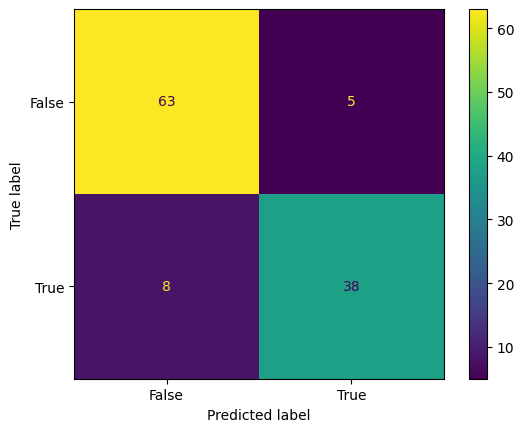

In [21]:
from sklearn.metrics import accuracy_score
from sklearn import metrics
y_pred = techniques.test_ELM(xin = X_test, Z = best_z, W = best_w, classification = True, control = True)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
acc_ = accuracy_score(y_test, y_pred)
print(f"A acurácia é de {acc_*100}%")
plt.show()